# Unsupervised learning 
Elimizde bağımlı bir değişken olmadığında, bağımsız değişkenler arasında nasıl işlemler yapılabildiğine yönelik yöntemler sunar.

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


# K-Means
Amacı gözlemleri birbirlerine olan benzerliklerine göre kümelere ayırmaktır. Kümeler kendi içlerinde homojen, birbirlerine göre heterojen olması hedeflenir. Böylece birbirine benzeyen gözlemler bir arada barınmış olur. Hiyerarşik olmayan kümelemeye örnektir. Önce rastgele noktalar belirlenip, gözlemlerin bu noktalara olan uzaklıkları doğrultusunda kümelenme oluşur. Her iterasyonda bu noktalar değişir.

In [2]:
df = pd.read_csv("USArrests.csv").copy()
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
df.index = df.iloc[:,0]
df.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='Unnamed: 0')

In [7]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,,
Alabama,Alabama,13.2,236,58,21.2
Alaska,Alaska,10.0,263,48,44.5
Arizona,Arizona,8.1,294,80,31.0
Arkansas,Arkansas,8.8,190,50,19.5
California,California,9.0,276,91,40.6


In [11]:
df = df.iloc[:,1:5]
df.head()

,Assault,UrbanPop,Rape
Unnamed: 0,,,
Alabama,236,58,21.2
Alaska,263,48,44.5
Arizona,294,80,31.0
Arkansas,190,50,19.5
California,276,91,40.6


In [15]:
#del df.index.name
df.index.name = None

In [17]:
df.head()

,Assault,UrbanPop,Rape
Alabama,236,58,21.2
Alaska,263,48,44.5
Arizona,294,80,31.0
Arkansas,190,50,19.5
California,276,91,40.6


In [19]:
df.isnull().sum()

Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Assault   50 non-null     int64  
 1   UrbanPop  50 non-null     int64  
 2   Rape      50 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.6+ KB


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Assault,50.0,170.760,83.337661,45.0,109.000,159.0,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.0,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.1,26.175,46.0


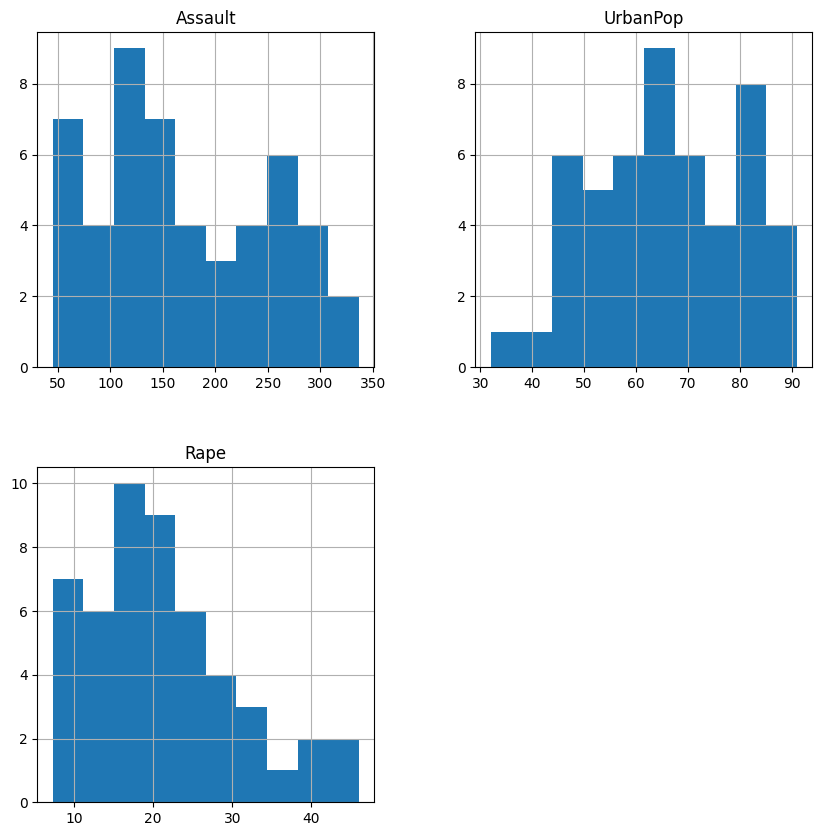

In [25]:
df.hist(figsize = (10,10));

## K-MEANS Model ve Görselleştirme

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans

KMeans(n_clusters=4)

In [ ]:
?kmeans

In [29]:
k_fit = kmeans.fit(df)
k_fit.n_clusters

4

In [31]:
k_fit.cluster_centers_

array([[112.4       ,  65.6       ,  17.27      ],
       [272.5625    ,  68.3125    ,  28.375     ],
       [ 62.7       ,  53.9       ,  11.51      ],
       [173.28571429,  70.64285714,  22.84285714]])

In [33]:
k_fit.labels_ #her bir gözlemin hangi class etiketine sahip olduğu bilgisi

array([1, 1, 1, 3, 1, 3, 0, 1, 1, 3, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 3, 1,
       2, 1, 3, 0, 0, 1, 2, 3, 1, 1, 1, 2, 0, 3, 3, 0, 3, 1, 2, 3, 3, 0,
       2, 3, 3, 2, 2, 3], dtype=int32)

In [151]:
#görsellestirme

In [37]:
kmeans = KMeans(n_clusters = 2)
k_fit = kmeans.fit(df)

kumeler = k_fit.labels_

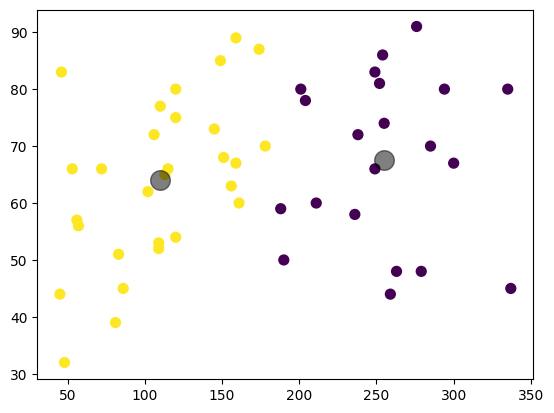

In [39]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = kumeler, s = 50, cmap = "viridis")#kümelenmeyi görselleştirme

merkezler = k_fit.cluster_centers_

plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha = 0.5);#kümelerin merkezlerini görselleştirme

In [41]:
from mpl_toolkits.mplot3d import Axes3D

In [43]:
#!pip install --upgrade matplotlib
import mpl_toolkits

In [45]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_
merkezler = kmeans.cluster_centers_

In [47]:
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2]);

<Figure size 1600x900 with 0 Axes>

In [49]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=kumeler)
ax.scatter(merkezler[:, 0], merkezler[:, 1], merkezler[:, 2], 
           marker='*', 
           c='#050505', 
           s=1000);

<Figure size 1600x900 with 0 Axes>

In [51]:
#kumeler ve gözlem birimleri

In [53]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_

In [55]:
pd.DataFrame({"Eyaletler" : df.index, "Kumeler": kumeler})[0:10]

,Eyaletler,Kumeler
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,1
7,Delaware,0
8,Florida,0
9,Georgia,2


In [65]:
df["kume_no"] = kumeler #dataframe'e ait oldukları kğme numaraları eklenmesi
df.head()

,Assault,UrbanPop,Rape,kume_no
Alabama,236,58,21.2,0
Alaska,263,48,44.5,0
Arizona,294,80,31.0,0
Arkansas,190,50,19.5,2
California,276,91,40.6,0


In [67]:
df["kume_no"] = df["kume_no"] + 1
df.head()

,Assault,UrbanPop,Rape,kume_no
Alabama,236,58,21.2,1
Alaska,263,48,44.5,1
Arizona,294,80,31.0,1
Arkansas,190,50,19.5,3
California,276,91,40.6,1


# Optimum Küme Sayısının Belirlenmesi

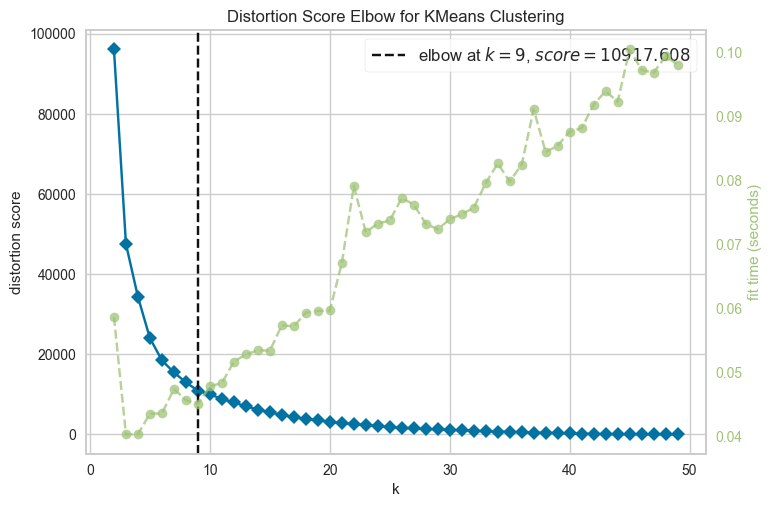

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [71]:
#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,50))
visualizer.fit(df) 
visualizer.poof() #sonucunda oluşan grafik bize kaç segmente ayırabileceğimiz hakkında bilgi verir. 
#Birbirine yakın noktalar(segment sayıları) demek kümeler arası homojenliğin artması demektir. 

In [78]:
kmeans = KMeans(n_clusters = 4)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_
pd.DataFrame({"Eyaletler" : df.index, "Kumeler": kumeler})[0:10]

,Eyaletler,Kumeler
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,1
7,Delaware,0
8,Florida,0
9,Georgia,2


# Hiyerarşik Kümeleme
Amaç gözlemleri birbirlerine olan benzerliklerine göre alt kümelere ayırmaktır. Hiyerarşik olmayan yöntemlerde küme sayısı uygulama yapılmadan önce belirlenir. Hiyerarşik kümelemede veriseti gözlemler ya da değişkenler bazında kümeleme işlemine sokulurken, hiyerarşik olmayan yöntemde sadece gözlemlerin kümelenmesi mümkündür.
Karar ağaçlarından farkı ayırma işlemi bağımlı değişken olmadığı için bağımsız değişkenler üzerinden yapılan uzaklık hesaplarına göre yapılır.

In [83]:
df = pd.read_csv("USArrests.csv").copy()
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
#df.index.name = None
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [89]:
from scipy.cluster.hierarchy import linkage
hc_complete = linkage(df, "complete")
hc_average = linkage(df, "average")
hc_single = linkage(df, "single")
dir(hc_complete)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__o

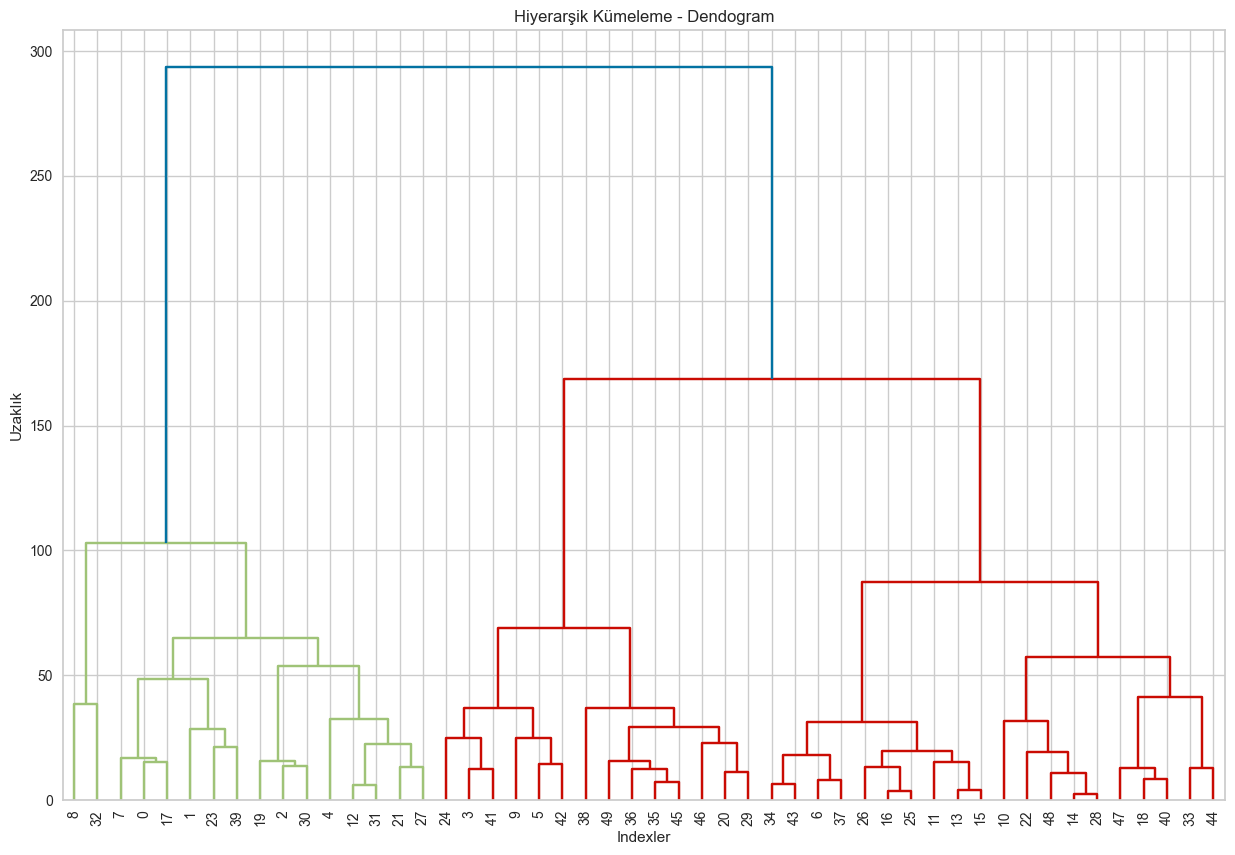

In [91]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(
    hc_complete,
    leaf_font_size=10
);

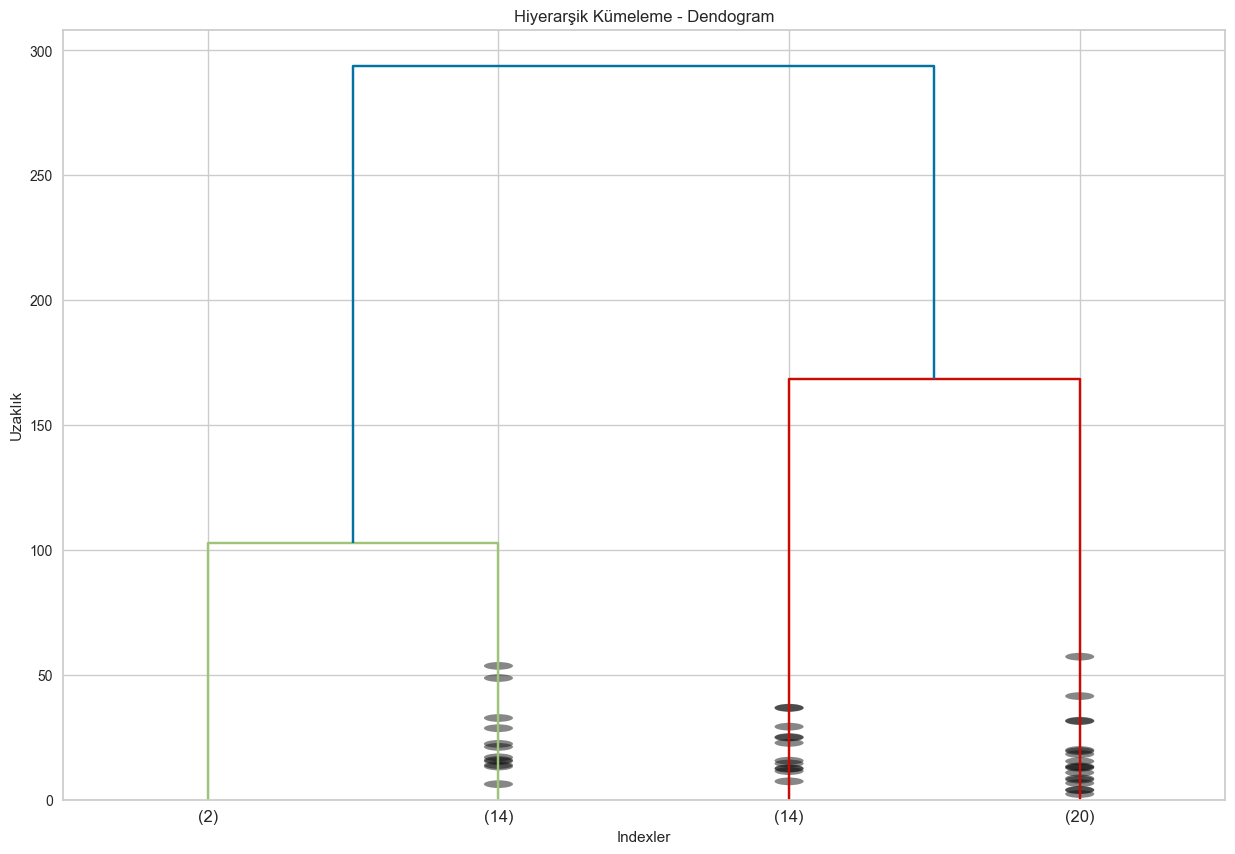

In [93]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(
    hc_complete,
    truncate_mode = "lastp",
    p = 4,
    show_contracted = True
);

## Optimum Küme Sayısı

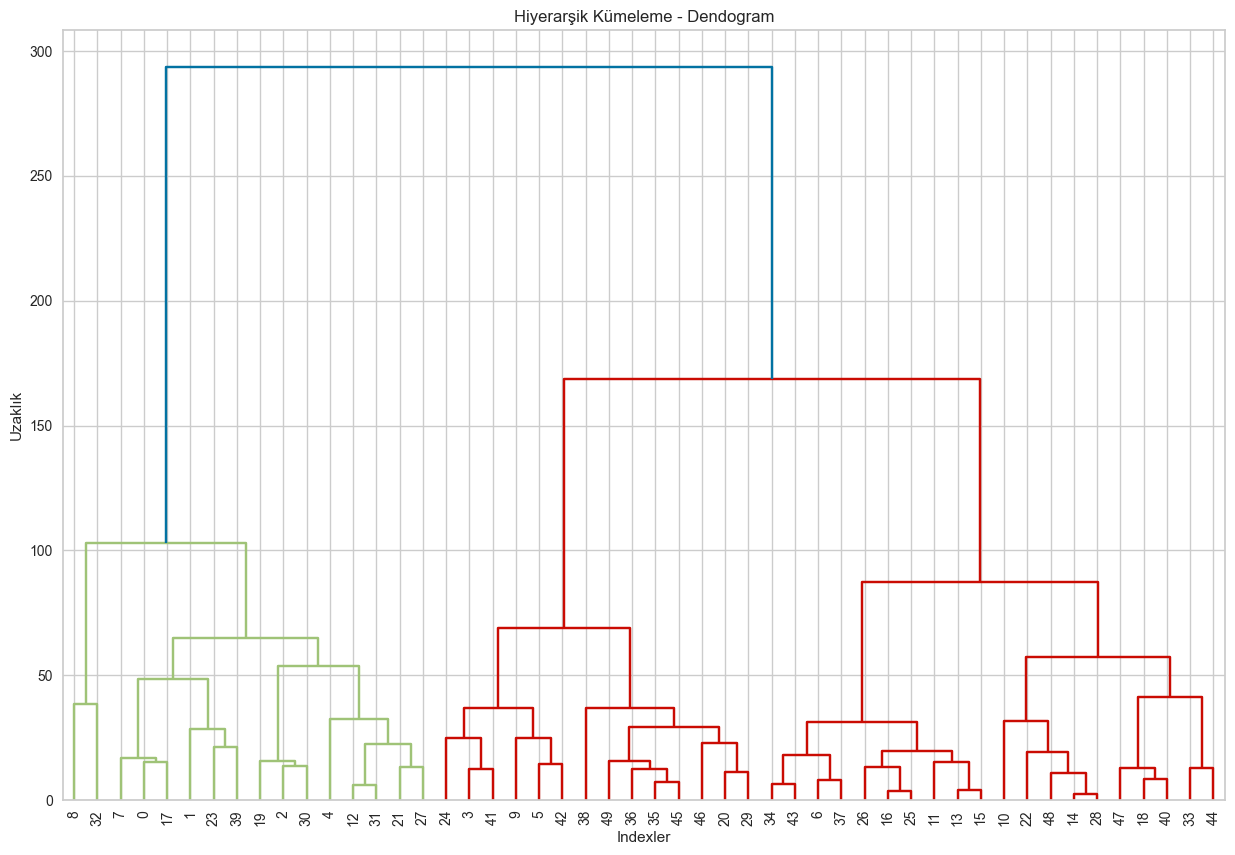

In [95]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
den = dendrogram(
    hc_complete,
    leaf_font_size=10
);

In [ ]:
?den

In [ ]:
?dendrogram

In [97]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 4, 
                                  affinity = "euclidean", 
                                  linkage = "ward")

cluster.fit_predict(df)#her bir gözlemin sınıf değerini ifade eder

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2])

In [99]:
pd.DataFrame({"Eyaletler" : df.index, "Kumeler": cluster.fit_predict(df)})[0:10]

,Eyaletler,Kumeler
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,3
7,Delaware,0
8,Florida,0
9,Georgia,2


In [103]:
df["kume_no"] = cluster.fit_predict(df)
df.head()

,Murder,Assault,UrbanPop,Rape,kume_no
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,0


# PCA
Amacı çok değişkenli verinin ana özelliklerini daha az sayıda değişken/bileşen ile temsil etmektir. Küçük miktarda bir bilgi kaybını göze alıp değişken boyutunu azaltmaktır.

In [107]:
df = pd.read_csv("USArrests.csv").copy()
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
#df.index.name = None
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [109]:
from warnings import filterwarnings
filterwarnings('ignore')

In [111]:
from sklearn.preprocessing import StandardScaler
df = StandardScaler().fit_transform(df)
df[0:5,0:5]

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393]])

In [113]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3) #temsil edilecek bileşen sayısı
pca_fit = pca.fit_transform(df)

In [117]:
#çok değişkenin az bileşen ile temsili
bilesen_df = pd.DataFrame(data = pca_fit, 
                          columns = ["birinci_bilesen","ikinci_bilesen","ucuncu_bilesen"])
bilesen_df.head()

,birinci_bilesen,ikinci_bilesen,ucuncu_bilesen
0,0.985566,1.133392,-0.444269
1,1.950138,1.073213,2.040003
2,1.763164,-0.745957,0.054781
3,-0.141420,1.119797,0.114574
4,2.523980,-1.542934,0.598557


In [119]:
pca.explained_variance_ratio_#indirgenmiş bileşenlerin datayı temsil etme oranı

array([0.62006039, 0.24744129, 0.0891408 ])

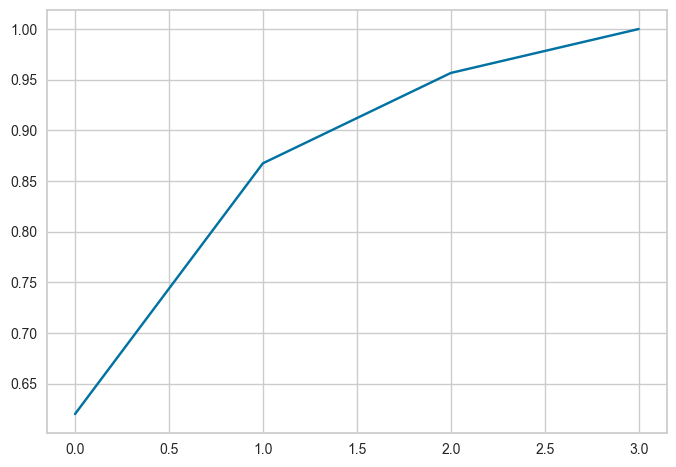

In [121]:
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
#çıkan grafikte kaç bileşenin verisetini yüzde kaç açıklayabileceğini gösterir.